In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv('D:\study\elevatelabs_aiml_intership\datasets\Iris.csv')
print (df.head())

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\chauh\AppData\Local\Temp\ipykernel_7696\3221393779.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('D:\study\elevatelabs_aiml_intership\datasets\Iris.csv')


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
df.drop(columns=["Id"], inplace=True, errors='ignore')


In [4]:
print (df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [5]:
# Separate features and target
X = df.drop("Species", axis=1)
y = df["Species"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling (normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


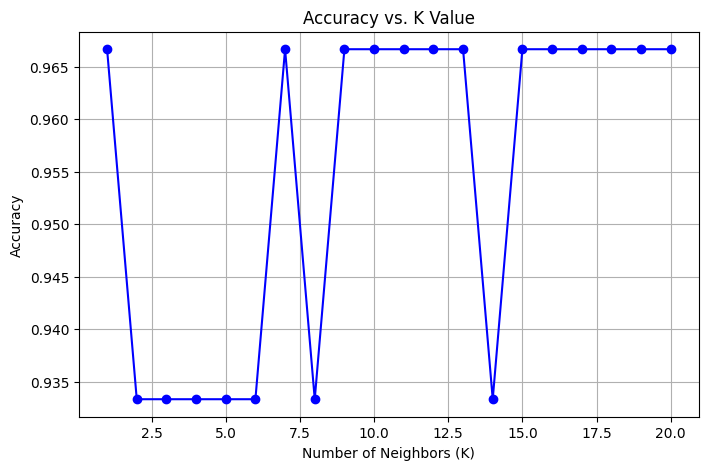

In [6]:
# Try different values of K and store accuracy
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot K vs. Accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', color='blue')
plt.title("Accuracy vs. K Value")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [7]:
# Select best K
best_k = k_values[np.argmax(accuracies)]
print(f"Best K: {best_k}")

# Train final model
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_final)
print("Confusion Matrix:\n", cm)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))


Best K: 1
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



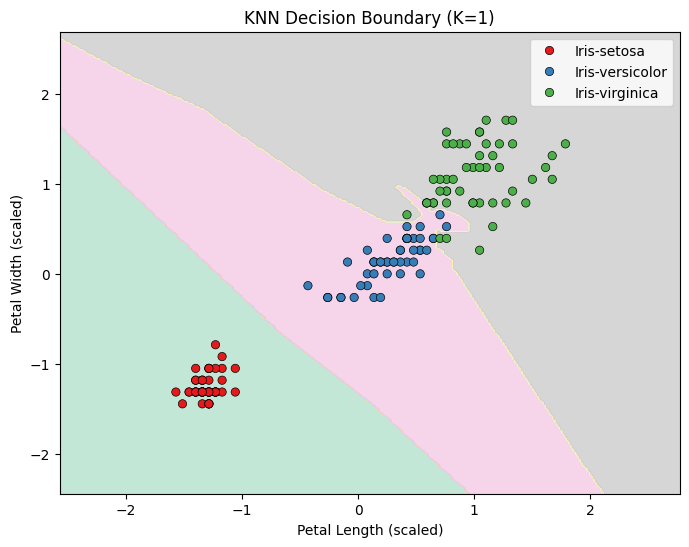

In [9]:
from sklearn.preprocessing import LabelEncoder

# Use only 2 features
features_2d = ['PetalLengthCm', 'PetalWidthCm']
X_vis = df[features_2d].values
y_vis = df['Species'].values

# Encode species labels as integers (0, 1, 2)
le = LabelEncoder()
y_vis_encoded = le.fit_transform(y_vis)

# Normalize the features
scaler_2d = StandardScaler()
X_vis_scaled = scaler_2d.fit_transform(X_vis)

# Train KNN
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_vis_scaled, y_vis_encoded)

# Create mesh grid
h = 0.02
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict over the mesh
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2, alpha=0.8)
sns.scatterplot(x=X_vis_scaled[:, 0], y=X_vis_scaled[:, 1],
                hue=y_vis, palette="Set1", edgecolor="k")
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.show()
